# Predicting Credit Card Approvals

<img src='Image/credit_cards.jpg' />

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step1.-Importing-data-and-libraries" data-toc-modified-id="Step1.-Importing-data-and-libraries-1">Step1. Importing data and libraries</a></span></li><li><span><a href="#Step2.-Preprocessing-the-data" data-toc-modified-id="Step2.-Preprocessing-the-data-2">Step2. Preprocessing the data</a></span></li><li><span><a href="#Step3.-Exploratory-data-analysis" data-toc-modified-id="Step3.-Exploratory-data-analysis-3">Step3. Exploratory data analysis</a></span></li><li><span><a href="#Step4.-Data-Analysis" data-toc-modified-id="Step4.-Data-Analysis-4">Step4. Data Analysis</a></span></li><li><span><a href="#Step5.-Conclusion-and-recommendation" data-toc-modified-id="Step5.-Conclusion-and-recommendation-5">Step5. Conclusion and recommendation</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6">References</a></span></li></ul></div>

# Introduction

Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low-income levels, or too many inquiries on an individual's credit report, etc.  Manually analyzing these applications is mundane, error-prone, and time-consuming. Fortunately, this task can be automated with the power of machine learning, and pretty much every commercial bank does so nowadays. To brainstorm together, my friends and I will build an automatic credit card approval predictor using machine learning techniques, just like real banks do.

## Step1. Importing data and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import plotly.express as px
from scipy import stats
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import scikitplot as skplt
sns.set()
%matplotlib inline
data = pd.read_csv("crx.csv", sep =",", header= None)
data.shape

(690, 16)

The data and libraries have been dully imported.

Viewing a sample of 10 rows of the data and general information. 

In [2]:
display(data.sample(10, random_state=42))
display(data.info())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
286,a,?,1.500,u,g,ff,ff,0.000,f,t,2,t,g,00200,105,-
511,a,46.00,4.000,u,g,j,j,0.000,t,f,0,f,g,00100,960,+
257,b,20.00,0.000,u,g,d,v,0.500,f,f,0,f,g,00144,0,-
336,b,47.33,6.500,u,g,c,v,1.000,f,f,0,t,g,00000,228,-
318,b,19.17,0.000,y,p,m,bb,0.000,f,f,0,t,s,00500,1,+
211,b,24.33,6.625,y,p,d,v,5.500,t,f,0,t,s,00100,0,+
624,b,21.58,0.790,y,p,cc,v,0.665,f,f,0,f,g,00160,0,-
176,b,25.00,12.500,u,g,aa,v,3.000,t,f,0,t,s,00020,0,+
462,b,21.92,0.500,u,g,c,v,0.125,f,f,0,f,g,00360,0,-
256,b,20.00,11.045,u,g,c,v,2.000,f,f,0,t,g,00136,0,-


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


None

The sample of 10 rows show the data is not labeled. The labels have been taken off due to customer data protction reasons. This makes it difficult not rename the columns. However, <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">this blog</a> gives us a pretty good overview of the probable features. The probable features in a typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>.
We would, therefore, rename the columns as such. 

In [3]:
data.columns=["Gender", "Age", "Debt", "Married", "BankCustomer", "EducationLevel", "Ethnicity", "YearsEmployed", "PriorDefault", "Employed", "CreditScore", "DriversLicense", "Citizen", "ZipCode", "Income", "ApprovalStatus"]

Viewing missing values in the data.

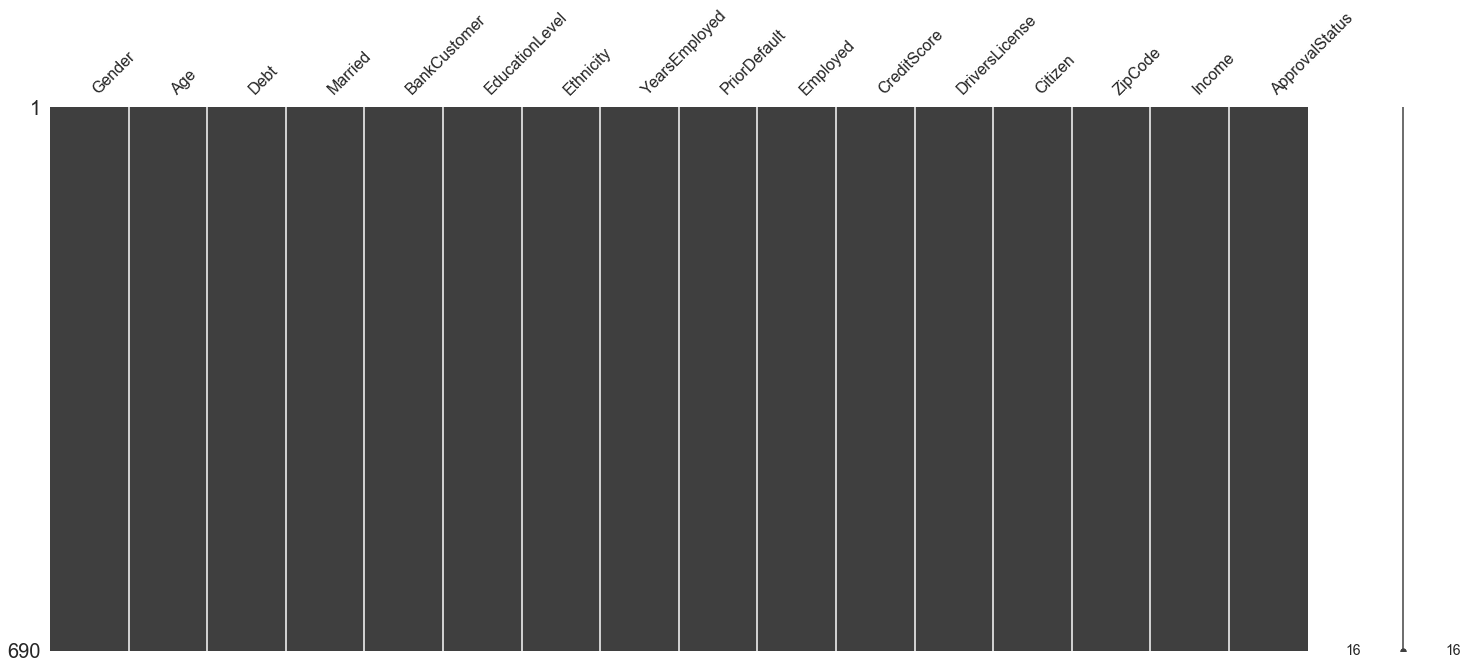

In [4]:
msno.matrix(data)
plt.show()

There don't seem to be missing values in the data but the sample shows presence of, for instance, "?" in the data that must be dealt with. We would preview general information again to ensure the columns are in the right data types.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


The general information shows age is an object instead of an integer or float probably. The others look fine.

I will check the description of the data

In [6]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,690,3,b,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,690,350,?,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Debt,690,NaN,NaN,NaN,4.75872,4.97816,0,1,2.75,7.2075,28
Married,690,4,u,519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BankCustomer,690,4,g,519,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationLevel,690,15,c,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ethnicity,690,10,v,399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearsEmployed,690,NaN,NaN,NaN,2.22341,3.34651,0,0.165,1,2.625,28.5
PriorDefault,690,2,t,361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employed,690,2,f,395,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The description shows that surprisingly, the most frequent age is a question mark ("?"). That sounds funny huh? The data values have been replaced with non-interpretable values and must be worked on before intrepreting.

Checking for duplicates

In [7]:
data.duplicated().sum()

0

There are no duplicates in the data.

**Interim Conclusion**

The data have been checked to ensure column values are in the right data types. Duplicates and missing values have be checked. It is time to clean the data.

## Step2. Preprocessing the data

Converting the columns names to lower case characteres

In [8]:
data.columns= data.columns.str.lower()

Replacing "?" in the dataframe with a Null value.

In [9]:
data = data.replace("?", np.nan)
data.isna().sum().sum()

67

Converting the age column to float

In [10]:
data["age"] = data["age"].astype("float64")

Machines learn better with quality data. Hence, We would fill the few missing values in the data with mean imputation.

In [11]:
data.fillna(np.mean(data), inplace=True)

data.isnull().sum().sum()

55

There are still missing values as the mean imputation only worked on numerical columns. We will iterate over each categorical column of data and fill with the most occuring value.

In [12]:
for col in data.columns:
    if data[col].dtype == 'object':
        data = data.fillna(data[col].value_counts().index[0])

data.isnull().sum().sum()

0

We would endcode the categorical columns with LabelEncoder so the machine learns better.

In [13]:
le = preprocessing.LabelEncoder()
for col in data.columns:
    if data[col].dtype=="object":
        data[col]=le.fit_transform(data[col])

In [14]:
data.head()

,gender,age,debt,married,bankcustomer,educationlevel,ethnicity,yearsemployed,priordefault,employed,creditscore,driverslicense,citizen,zipcode,income,approvalstatus
0,1,30.83,0.000,2,1,13,8,1.25,1,1,1,0,0,68,0,0
1,0,58.67,4.460,2,1,11,4,3.04,1,1,6,0,0,11,560,0
2,0,24.50,0.500,2,1,11,4,1.50,1,0,0,0,0,96,824,0
3,1,27.83,1.540,2,1,13,8,3.75,1,1,5,1,0,31,3,0
4,1,20.17,5.625,2,1,13,8,1.71,1,0,0,0,2,37,0,0


**Interim Conclusion**

The data has been preprocessed, the few missing values in the numerical columns have been filled with mean imputations, all categorical columns have been encoded.

## Step3. Exploratory data analysis

In this step, we will visualize the distributtion of the data before proceeding to build the model.

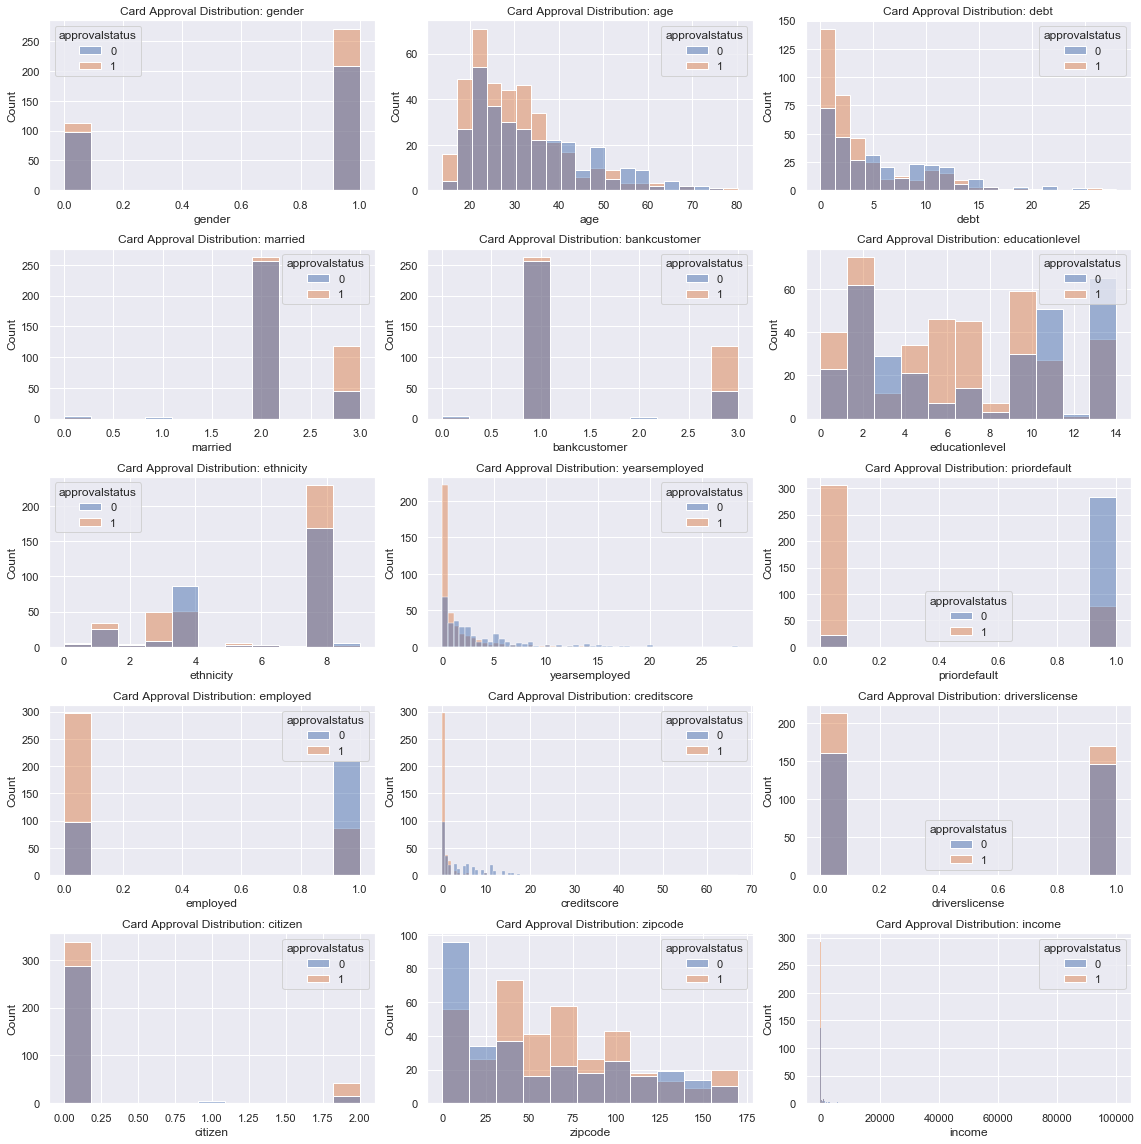

In [15]:
count=1
plt.subplots(figsize=(16, 16))
for i in data.drop("approvalstatus",axis=1).columns:
    if count > 15:
        continue
    else:
        plt.subplot(5,3,count)
        plt.title('Card Approval Distribution: {}'.format(str(i)))
        sns.histplot(data=data, x= i, hue="approvalstatus", color ="coolwarm")
        count+=1
plt.tight_layout()
plt.show()

The distributions shows more males apply for credit cards than females. The most credit card applicants are between age 20 and 40. These age group also has more credit card approvals than the other age groups. Applicants aged above 60 years are the least to apply for credit cards and the ones who are less likely to have their credit cards approved. The smaller a customer's debt, the higher the chances of a credit card approval. 

Checking the proportion of credit cards approval.

In [16]:
data.approvalstatus.value_counts().to_frame()

,approvalstatus
1,383
0,307


More than 50% of credit card applications gets approved.

We would also check correlation between the features and the target variable (approval status). We would use point biserial as most of the variables are categorical.

In [17]:
for i in data.drop("approvalstatus",axis=1).columns:
    print("Correlation between {} and Credit card approval: {}".format(i, stats.pointbiserialr(data[i],data["approvalstatus"])))

Correlation between gender and Credit card approval: PointbiserialrResult(correlation=0.02893421558516672, pvalue=0.44795993459498973)
Correlation between age and Credit card approval: PointbiserialrResult(correlation=-0.16162736970517813, pvalue=1.9902200656147554e-05)
Correlation between debt and Credit card approval: PointbiserialrResult(correlation=-0.20629373864503903, pvalue=4.5516807023076266e-08)
Correlation between married and Credit card approval: PointbiserialrResult(correlation=0.1914311984528414, pvalue=4.056320035493064e-07)
Correlation between bankcustomer and Credit card approval: PointbiserialrResult(correlation=0.18752005634249852, pvalue=7.017087000110639e-07)
Correlation between educationlevel and Credit card approval: PointbiserialrResult(correlation=-0.1300256865488034, pvalue=0.0006174115215022631)
Correlation between ethnicity and Credit card approval: PointbiserialrResult(correlation=-0.0008770510424476619, pvalue=0.9816530809171949)
Correlation between yearsem

There is a negative and insignificant correlation between age and credit card approval. There is also a negative and insignificant correlation between debt and credit card approval, and years employed and credit card approval (surprising). Surprisingly, there is a negative and significant correlation between educationlevel and credit card approval.  

I would check correlation between the quantitative variables.

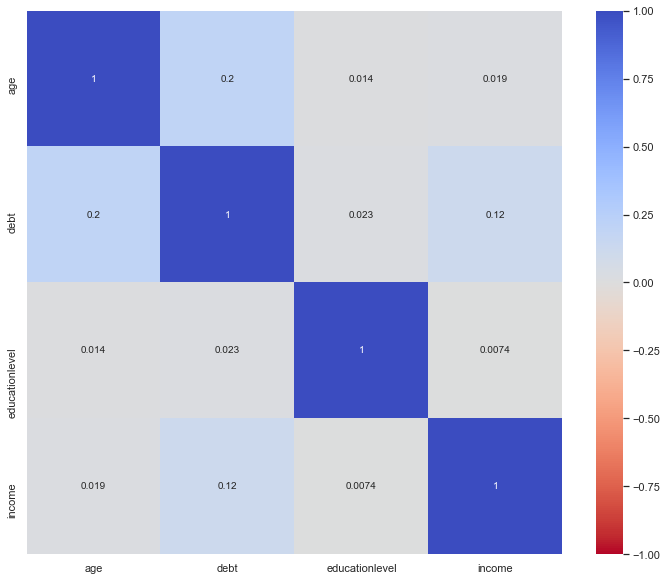

In [18]:
continuous_data = data[['age','debt', 'educationlevel', 'income']]

fig, ax = plt.subplots()
fig.set_size_inches(12,10)
sns.heatmap(continuous_data.corr(), annot= True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm_r')
plt.show()

There is a positive correlation between age, debt, educational level, and income. 

We would drop driverslicense and zipcode as they are not expected to have impact on credit card approval. 

In [19]:
data.drop(['driverslicense', 'zipcode'], axis=1, inplace=True)
data.columns

Index(['gender', 'age', 'debt', 'married', 'bankcustomer', 'educationlevel',
       'ethnicity', 'yearsemployed', 'priordefault', 'employed', 'creditscore',
       'citizen', 'income', 'approvalstatus'],
      dtype='object')

## Step4. Data Analysis

We would fit the model by scaling the data with the MinMax Scaler, and would split the data into 25% validation, and 75% training.

In [20]:
features = data.drop("approvalstatus",axis=1)
target = data["approvalstatus"]

X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=.25)
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
X_train_st = scaler.fit_transform(X_train) 

print(X_train_st[:5])

X_test_st = scaler.transform(X_test)

[[1.00000000e+00 1.69022741e-01 4.46428571e-01 1.00000000e+00
  1.00000000e+00 6.42857143e-01 4.44444444e-01 4.38596491e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.32681018e-04]
 [1.00000000e+00 2.40626921e-01 0.00000000e+00 6.66666667e-01
  3.33333333e-01 9.28571429e-01 8.88888889e-01 4.38596491e-02
  1.00000000e+00 1.00000000e+00 1.49253731e-02 0.00000000e+00
  0.00000000e+00]
 [1.00000000e+00 2.15119852e-01 1.25000000e-01 6.66666667e-01
  3.33333333e-01 9.28571429e-01 8.88888889e-01 1.22807018e-01
  1.00000000e+00 1.00000000e+00 4.47761194e-02 0.00000000e+00
  0.00000000e+00]
 [1.00000000e+00 3.16226183e-01 8.62500000e-02 6.66666667e-01
  3.33333333e-01 9.28571429e-01 8.88888889e-01 4.38596491e-03
  0.00000000e+00 1.00000000e+00 2.98507463e-02 0.00000000e+00
  1.95694716e-05]
 [1.00000000e+00 6.83773817e-01 5.50000000e-02 6.66666667e-01
  3.33333333e-01 7.85714286e-01 8.88888889e-01 4.38596491e-03
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+0

Comparing the performance of different models to be able to select the best among them. 

In [21]:
def print_metrics(y_true, y_pred, title = 'Classification metrics'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1_score: {:.2f}'.format(f1_score(y_true, y_pred, average='weighted')))



lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)

print_metrics(y_test, lr_predictions, title='Metrics for Logistic Regression:')
print()
print("Displaying report in classes:")
print(classification_report(y_test, lr_predictions))

print()

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)
print_metrics(y_test, rf_predictions, title='Metrics for RandomForest Classifier:')
print()
print("Displaying report in classes:")
print(classification_report(y_test, rf_predictions))

print()

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_st, y_train)
gb_predictions = gb_model.predict(X_test_st)
gb_probabilities = gb_model.predict_proba(X_test_st)
print_metrics(y_test, gb_predictions, title='Metrics for GradientBoosting Classifier:')
print()
print("Displaying report in classes:")
print(classification_report(y_test, gb_predictions))


Metrics for Logistic Regression:
	Accuracy: 0.87
	Precision: 0.93
	Recall: 0.83
	F1_score: 0.87

Displaying report in classes:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        79
           1       0.93      0.83      0.88        94

    accuracy                           0.87       173
   macro avg       0.87      0.88      0.87       173
weighted avg       0.88      0.87      0.87       173


Metrics for RandomForest Classifier:
	Accuracy: 0.87
	Precision: 0.91
	Recall: 0.84
	F1_score: 0.87

Displaying report in classes:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        79
           1       0.91      0.84      0.87        94

    accuracy                           0.87       173
   macro avg       0.87      0.87      0.87       173
weighted avg       0.87      0.87      0.87       173


Metrics for GradientBoosting Classifier:
	Accuracy: 0.87
	Precision: 0.92
	Recall: 0.8

The models all perform very similar with no signification differences and hence we could use any of these models. With random forest model being able to deal comparatively much better with balnacing between overfitting and underfitting. We would go for the RamdomForest model.

We would want to hyper tune the model parameters to improve of the model (with GridSearchCV). We would resample with 5 fold to evaluate the model as we have a limited data sample. These would help us better arrive at a reflecting accuracy. 

In [22]:
crf= GridSearchCV(RandomForestClassifier(random_state=42), { "n_estimators":[100,120,200], "criterion" : ["gini", "entropy"], "max_depth" : [None, 1,3,10] }, cv=5)


In [23]:
crf.fit(X_train_st,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 3, 10],
                         'n_estimators': [100, 120, 200]})

In [ ]:
df=pd.DataFrame(crf.cv_results_)
df[["param_criterion", "param_max_depth", "param_n_estimators", "mean_test_score"]]

Retrieving the best parameters

In [24]:
crf.best_params_

{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 200}

Fitting the RandomForest Classifier with the best parameters.

In [25]:
rf = RandomForestClassifier(random_state=42, n_estimators =200, criterion = "gini", max_depth= 3)
rf.fit(X_train_st, y_train)
pred = rf.predict(X_test_st)
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.89      0.87        79\n           1       0.90      0.87      0.89        94\n\n    accuracy                           0.88       173\n   macro avg       0.88      0.88      0.88       173\nweighted avg       0.88      0.88      0.88       173\n'

In [26]:
accuracy_score(y_test,pred)


0.8786127167630058

The model has an accuracy of about 88%.

Visualing the confusion matrix.

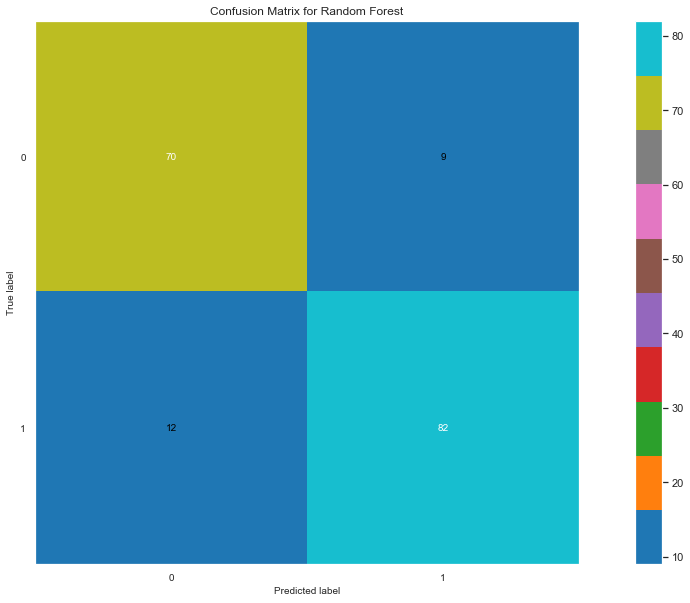

In [28]:
skplt.metrics.plot_confusion_matrix(y_test,pred,cmap='tab10',figsize= (20,10), \
                                    title= "Confusion Matrix for Random Forest")
plt.show()

The confusion matrix shows the model is doing great at predicting credit cards.

Predicting the probability of a credit card approval. We would export the outcome and conduct decile analysis with the help of MS excel. This would help us project the probability of customers credict card approvals.

In [29]:
features["prediction"]=rf.predict_proba(features)[:,1]
features.head()

,gender,age,debt,married,bankcustomer,educationlevel,ethnicity,yearsemployed,priordefault,employed,creditscore,citizen,income,prediction
0,1,30.83,0.000,2,1,13,8,1.25,1,1,1,0,0,0.281928
1,0,58.67,4.460,2,1,11,4,3.04,1,1,6,0,560,0.113480
2,0,24.50,0.500,2,1,11,4,1.50,1,0,0,0,824,0.337938
3,1,27.83,1.540,2,1,13,8,3.75,1,1,5,0,3,0.112483
4,1,20.17,5.625,2,1,13,8,1.71,1,0,0,2,0,0.450357


Importing the decile analysis for further intrepretations.

<img src='Image/image.PNG' />

The decile analysis shows that the top 10% of customers have about 80% probability that their credit cards would be approved. Customers in deciles 1-6 have more than 50% chance that their credit cards would be approved. 
Customers in deciles 7-10 have less than 50 % chance of getting their credit cards approved. 

## Step5. Conclusion and recommendation

**Conclusion**

- More than 50% of credit card applications get approved.
- Males apply for credit cards more than females. 
- The most credit card applicants are between age 20 and 40. This age group also has more credit card approvals than the other age groups. 
- Applicants aged above 60 years are the least to apply for credit cards and the ones who are less likely to have their credit cards approved. 
- The smaller a customer's debt, the higher the chances of a credit card approval.
- The model has about 88% accuracy of predicting a credit card approval.
- Top 10% of customers have about 80% probability that their credit cards would be approved. 
- Customers in deciles 1-6 have more than 50% chance that their credit cards would be approved. 
- Customers in deciles 7-10 have less than 50 % chance of getting their credit cards approved. 

**Recommendations**

- Approve credit cards of customers in deciles 1-6.
- Do not approve the credit cards of customers in deciles 7-10.

## References
[Predicting Credit Card Approvals - Data Camp](https://learn.datacamp.com/projects/558)

[Analysis of Credit Approval Data](http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html)